In [5]:
# 📈 SMA Crossover Strategy
# Author: Your Name
# Project: Beginner Quant Analyst Project (CS 200 Level)
# Description: Backtesting a simple trading strategy using Python and historical stock data

# --- Step 1: Import Libraries ---
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# style settings
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 7)

# Change the ticker to test with different stocks
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2023-01-01"

data = yf.download(ticker, start=start_date, end=end_date)
data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620842,72.681289,71.373218,71.627092,135480400
2020-01-03,71.914803,72.676431,71.689942,71.847102,146322800
2020-01-06,72.487862,72.526549,70.783263,71.034724,118387200
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200


In [6]:
# Calculate Moving Averages
# Short-term and long-term simple moving averages
short_window = 20
long_window = 50

data['SMA20'] = data['Close'].rolling(window=short_window).mean()
data['SMA50'] = data['Close'].rolling(window=long_window).mean()

# Drop rows with NaN values caused by moving average window
data.dropna(inplace=True)
data.head()


Price,Close,High,Low,Open,Volume,SMA20,SMA50
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2020-03-13,67.369148,67.841756,61.305270,64.199067,370732000,70.923010,74.025907
2020-03-16,58.702312,62.790941,58.166693,58.639296,322423600,69.920361,73.747536
2020-03-17,61.283451,62.434663,57.778907,59.986817,324056000,69.118873,73.534909
2020-03-18,59.783237,60.590301,57.468687,58.110947,300233600,68.186388,73.280817
2020-03-19,59.325172,61.278603,58.799249,59.957735,271857200,67.271232,73.024381


In [7]:
# Create Buy/Sell Signals 
# Signal: 1 when short MA is greater than long MA, 0 otherwise
data['Signal'] = 0
data['Signal'] = np.where(data['SMA20'] > data['SMA50'], 1, 0)

# Position: When a crossover happens (1 = buy, -1 = sell)
data['Position'] = data['Signal'].diff()

data[['Close', 'SMA20', 'SMA50', 'Signal', 'Position']].tail()


Price,Close,SMA20,SMA50,Signal,Position
Ticker,AAPL,,,,
Date,,,,,
2022-12-23,130.173813,138.862237,142.216761,0,0.0
2022-12-27,128.367188,138.161810,142.056421,0,0.0
2022-12-28,124.428215,137.414986,141.737865,0,0.0
2022-12-29,127.952553,136.505763,141.463381,0,0.0
2022-12-30,128.268448,135.598514,141.193047,0,0.0


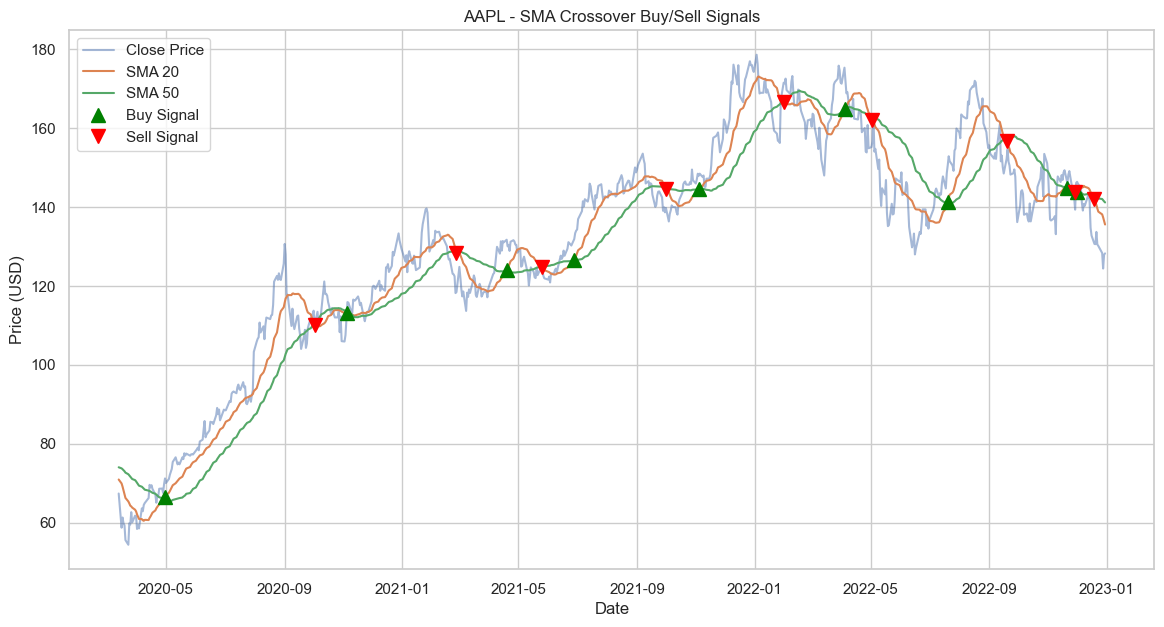

In [8]:
# Plot Buy/Sell Signals with Price 

plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(data['SMA20'], label='SMA 20')
plt.plot(data['SMA50'], label='SMA 50')

# Mark Buy signals
plt.plot(data[data['Position'] == 1].index,
         data['SMA20'][data['Position'] == 1],
         '^', markersize=10, color='green', label='Buy Signal')

# Mark Sell signals
plt.plot(data[data['Position'] == -1].index,
         data['SMA20'][data['Position'] == -1],
         'v', markersize=10, color='red', label='Sell Signal')

plt.title(f"{ticker} - SMA Crossover Buy/Sell Signals")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


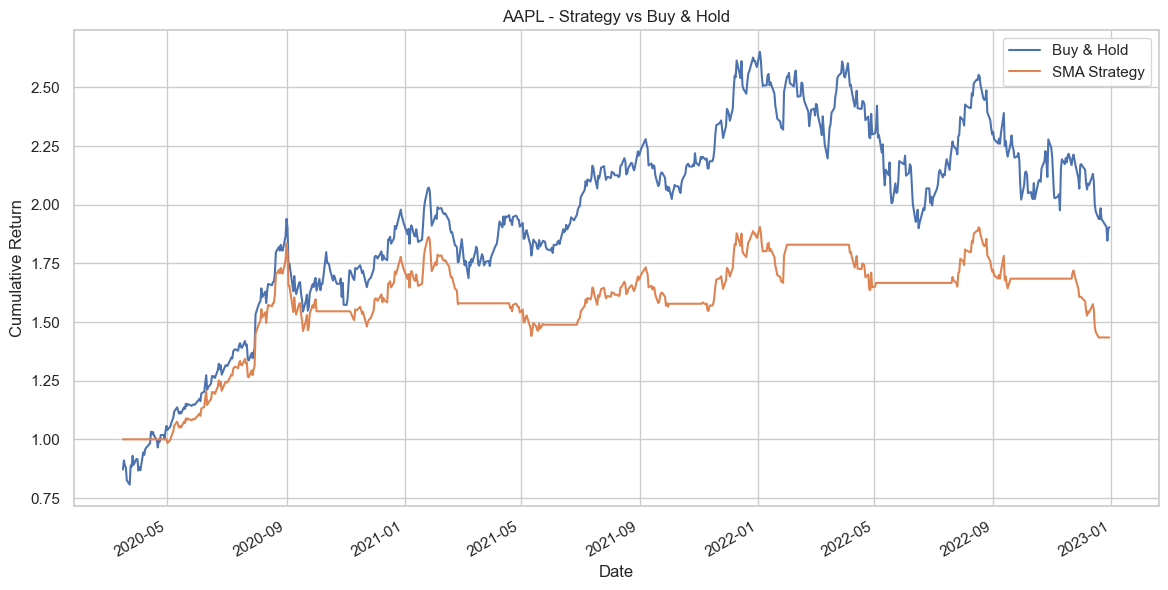

In [9]:
# Backtest the Strategy 
# Calculate daily returns

data['Return'] = data['Close'].pct_change()

# Strategy Return: Use signal (1 or 0) from previous day
data['Strategy_Return'] = data['Return'] * data['Signal'].shift(1)

# Cumulative returns
(1 + data[['Return', 'Strategy_Return']]).cumprod().plot()
plt.title(f"{ticker} - Strategy vs Buy & Hold")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend(["Buy & Hold", "SMA Strategy"])
plt.show()


In [10]:
# Evaluate Performance 
# Total return comparison
total_return_strategy = data['Strategy_Return'].sum()
total_return_market = data['Return'].sum()

print(f"📊 Total Buy & Hold Return: {total_return_market:.2%}")
print(f"📈 Total Strategy Return: {total_return_strategy:.2%}")

# Sharpe Ratio (simplified, assuming 252 trading days)
sharpe_ratio = data['Strategy_Return'].mean() / data['Strategy_Return'].std() * np.sqrt(252)
print(f"⚖️ Sharpe Ratio: {sharpe_ratio:.2f}")


📊 Total Buy & Hold Return: 81.48%
📈 Total Strategy Return: 43.88%
⚖️ Sharpe Ratio: 0.66


[*********************100%***********************]  1 of 1 completed


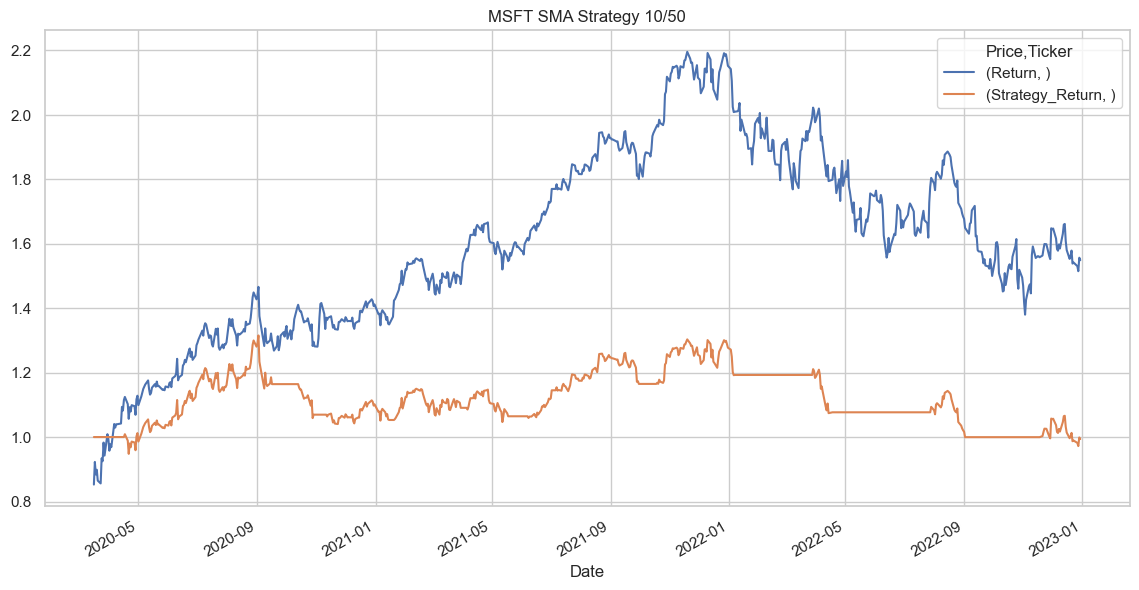

MSFT - Strategy Return: 5.00%, Sharpe Ratio: 0.09


In [11]:
# Test on Other Stocks or MAs

def test_sma_strategy(ticker, short_window=20, long_window=50):
    df = yf.download(ticker, start="2020-01-01", end="2023-01-01")
    df['SMA_Short'] = df['Close'].rolling(window=short_window).mean()
    df['SMA_Long'] = df['Close'].rolling(window=long_window).mean()
    df.dropna(inplace=True)
    df['Signal'] = np.where(df['SMA_Short'] > df['SMA_Long'], 1, 0)
    df['Return'] = df['Close'].pct_change()
    df['Strategy_Return'] = df['Return'] * df['Signal'].shift(1)
    cumulative = (1 + df[['Return', 'Strategy_Return']]).cumprod()
    cumulative.plot(title=f"{ticker} SMA Strategy {short_window}/{long_window}")
    plt.show()
    print(f"{ticker} - Strategy Return: {df['Strategy_Return'].sum():.2%}, Sharpe Ratio: {(df['Strategy_Return'].mean() / df['Strategy_Return'].std()) * np.sqrt(252):.2f}")

# Example:
test_sma_strategy("MSFT", 10, 50)
